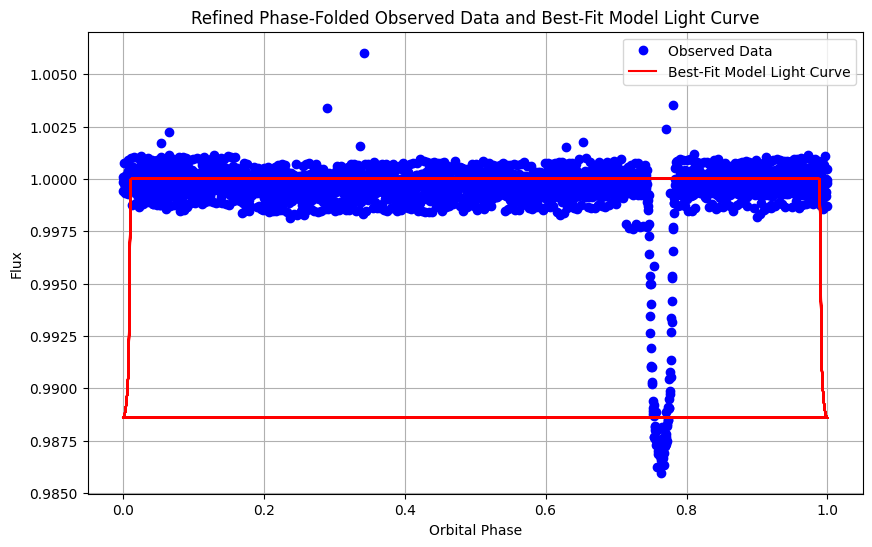

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import batman

# Load data (provide the path to your dataset)
data_planet = pd.read_excel("ep206103150.xlsx")
time_data = np.array(data_planet['time'])
flux_data = np.array(data_planet['flux'])

# Define a function to generate the model light curve with best-fit parameters
def generate_model(time, params):
    m = batman.TransitModel(params, time)
    return m.light_curve(params)

# Best-fit parameters for WASP-47b from the papers
best_fit_params = batman.TransitParams()
best_fit_params.t0 = 2150.96
best_fit_params.per = 4.1591
best_fit_params.rp = 0.10186
best_fit_params.a = 13.18
best_fit_params.inc = 87.47
best_fit_params.ecc = 0.0
best_fit_params.w = 90.0
best_fit_params.limb_dark = "quadratic"  # Set the limb darkening model
best_fit_params.u = [0.4, 0.2]  # Limb darkening parameters

# Generate the model light curve with best-fit parameters
model_time = np.linspace(time_data.min(), time_data.max(), len(time_data) * 10)
model_flux = generate_model(model_time, best_fit_params)

# Calculate orbital phase
orbital_phase = ((time_data - best_fit_params.t0) % best_fit_params.per) / best_fit_params.per

# Calculate phase for the model time as well
model_phase = ((model_time - best_fit_params.t0) % best_fit_params.per) / best_fit_params.per

# Plot the observed data without connecting the blue points
plt.figure(figsize=(10, 6))
plt.plot(orbital_phase, flux_data, marker='o', linestyle='', color='b', label='Observed Data')

# Plot the model with a higher density of points
plt.plot(model_phase, model_flux, color='r', label='Best-Fit Model Light Curve')

plt.xlabel('Orbital Phase')
plt.ylabel('Flux')
plt.title('Refined Phase-Folded Observed Data and Best-Fit Model Light Curve')
plt.legend()
plt.grid(True)
plt.show()
